<a href="https://colab.research.google.com/github/gmdeorozco/Wisconsin-Breast-Cancer-Binary-Cl-Algorithms/blob/main/Wisconsin_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Binary Classification with Logistic Regression: Breast Cancer Wisconsin Dataset**

# Import necessary libraries
Import the required libraries for data manipulation, model training, and evaluation, including NumPy and Pandas for data handling, scikit-learn's `load_breast_cancer` to access the dataset, and functions for model evaluation such as `accuracy_score`, `confusion_matrix`, and `classification_report`.

In [40]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the Breast Cancer Wisconsin dataset
Load the Breast Cancer Wisconsin dataset using the `load_breast_cancer()` function from scikit-learn. The features are stored in the variable `X`, and the target labels (binary: 0 for benign, 1 for malignant) are stored in the variable `y`.

In [49]:
data = load_breast_cancer()
X = data.data
y = data.target
# Normalize the feature matrix using Min-Max scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
Use `train_test_split()` to split the dataset into training and testing sets. The test set contains 20% of the data, and the random state is set to 42 for reproducibility.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exploratory Data Analysis (EDA)

## Convert the data to a Pandas DataFrame

In [60]:
df = pd.DataFrame(data=np.c_[X, y], columns=np.append(data.feature_names, ['target']))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.0


## Violinplots to visualize relationships between features and the binary target

<Axes: xlabel='features', ylabel='value'>

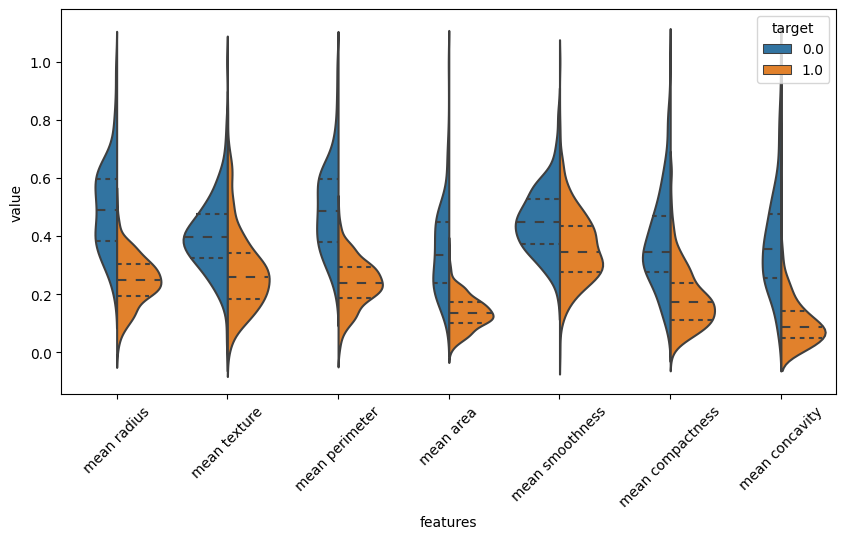

In [66]:
plt.figure(figsize = (10,5))
plt.xticks(rotation=45)

# Relocate the last column to be the first column
last_column_name = df.columns[-1]
data_violin = pd.concat([df[last_column_name], df.drop(last_column_name, axis=1)], axis=1)
data_violin = data_violin.iloc[:,0:8]
data_violin = pd.melt(data_violin, id_vars='target',
              var_name='features',
             value_name= 'value')
sns.violinplot(data_violin, x='features', y='value', hue= 'target', inner='quarts', split=True)

<Axes: xlabel='features', ylabel='value'>

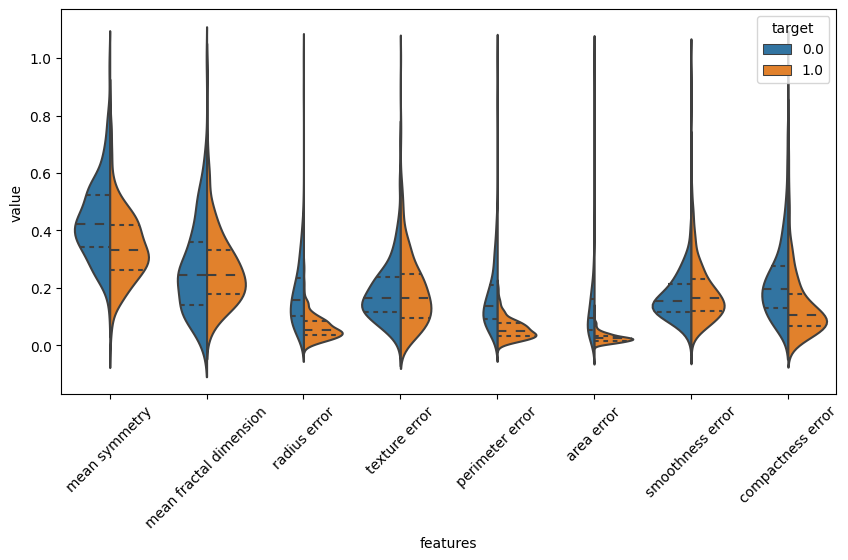

In [67]:
plt.figure(figsize = (10,5))
plt.xticks(rotation=45)

# Relocate the last column to be the first column
last_column_name = df.columns[-1]
data_violin = pd.concat([df[last_column_name], df.drop(last_column_name, axis=1)], axis=1)

data_violin = pd.concat([data_violin.iloc[:, 0], data_violin.iloc[:, 9:17]], axis=1)
data_violin = pd.melt(data_violin, id_vars='target',
              var_name='features',
             value_name= 'value')
sns.violinplot(data_violin, x='features', y='value', hue= 'target', inner='quarts', split=True)

<Axes: xlabel='features', ylabel='value'>

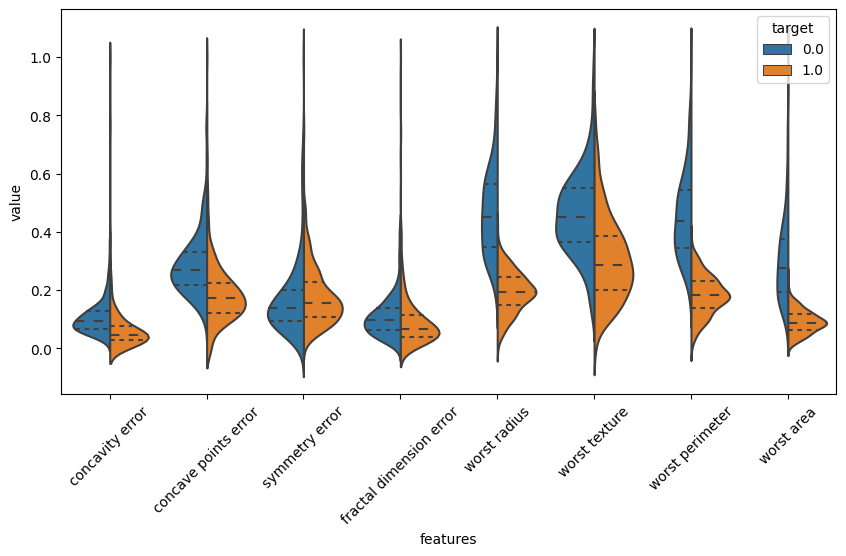

In [68]:
plt.figure(figsize = (10,5))
plt.xticks(rotation=45)

# Relocate the last column to be the first column
last_column_name = df.columns[-1]
data_violin = pd.concat([df[last_column_name], df.drop(last_column_name, axis=1)], axis=1)

data_violin = pd.concat([data_violin.iloc[:, 0], data_violin.iloc[:, 17:25]], axis=1)
data_violin = pd.melt(data_violin, id_vars='target',
              var_name='features',
             value_name= 'value')
sns.violinplot(data_violin, x='features', y='value', hue= 'target', inner='quarts', split=True)

<Axes: xlabel='features', ylabel='value'>

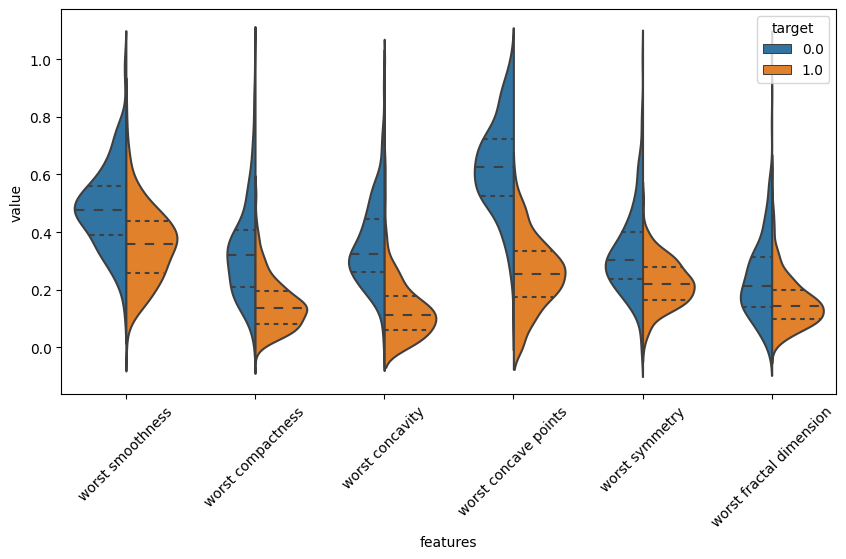

In [69]:
plt.figure(figsize = (10,5))
plt.xticks(rotation=45)

# Relocate the last column to be the first column
last_column_name = df.columns[-1]
data_violin = pd.concat([df[last_column_name], df.drop(last_column_name, axis=1)], axis=1)

data_violin = pd.concat([data_violin.iloc[:, 0], data_violin.iloc[:, 25:33]], axis=1)
data_violin = pd.melt(data_violin, id_vars='target',
              var_name='features',
             value_name= 'value')
sns.violinplot(data_violin, x='features', y='value', hue= 'target', inner='quarts', split=True)

**Correlation Heatmap:** We use sns.heatmap() from Seaborn to create a heatmap showing the correlation between all features. This helps identify which features are highly correlated with each other, which can be essential for feature selection and model building.

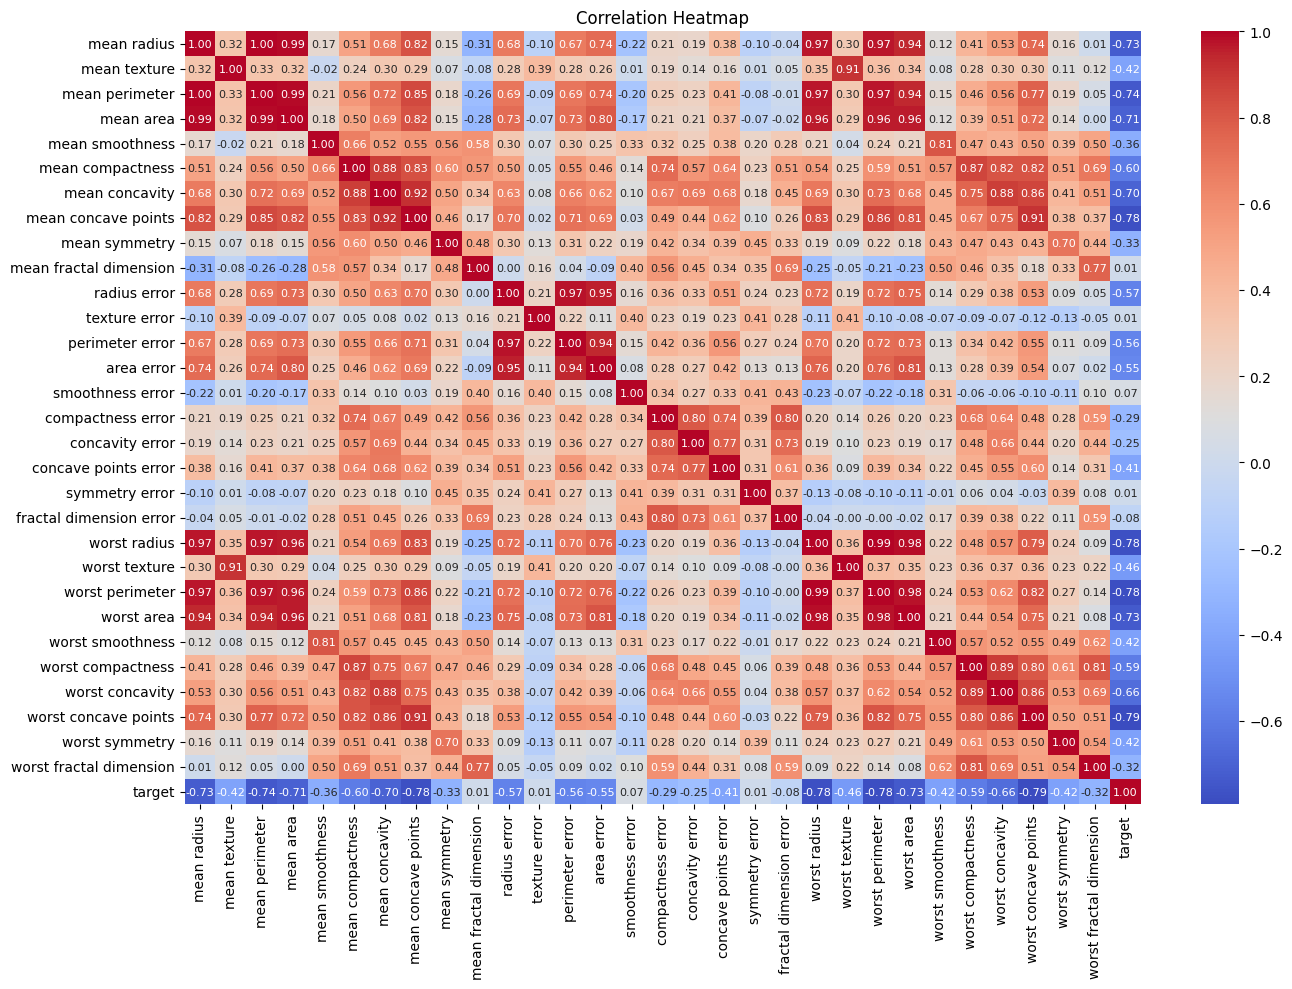

In [8]:
# Correlation heatmap to identify feature relationships
#plt.figure(figsize=(12, 8))
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f',annot_kws={'size': 8})
plt.title("Correlation Heatmap")
plt.tight_layout()  # To prevent overlapping of the title and axis labels
plt.show()

# **A. Logistic Regression**

In [70]:
# Create a logistic regression model for binary classification
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9824561403508771
Confusion Matrix:
[[41  2]
 [ 0 71]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# **B. K-Nearest Neighbors**

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a k-Nearest Neighbors (K-NN) model for binary classification
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of n_neighbors as needed

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.9649122807017544
Confusion Matrix:
[[41  2]
 [ 2 69]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

